In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn import metrics


In [11]:

train = pd.read_csv("topfeatures.csv")

# train.head()

In [12]:
train.shape

trainclass1 = train.loc[train['target'] == 1]
trainclass0 = train.loc[train['target'] == 0]

print(trainclass1.shape)
print(trainclass0.shape)

trainclass1head500 = trainclass1.head(5000)
trainclass0head500 = trainclass0.head(5000)

frames = [trainclass1head500, trainclass0head500]
train1 = pd.concat(frames)

train1.shape

(21694, 12)
(573518, 12)


(10000, 12)

In [13]:
X = train1[train1.columns[2:]]
y = train1[train1.columns[1:2]]

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=123, stratify = y)

In [31]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=1000,max_depth = 4)

clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [32]:
# Random forest performance 
print("Random forest Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Random forest Precision:",metrics.precision_score(y_test, y_pred))
print("Random forest Recall:",metrics.recall_score(y_test, y_pred))
print("Random forest AUC:",metrics.roc_auc_score(y_test, y_pred))


Random forest Accuracy: 0.5656
Random forest Precision: 0.5682196339434277
Random forest Recall: 0.5464
Random forest AUC: 0.5656


In [18]:
rbfcnf_matrix = metrics.confusion_matrix(y_test, y_pred)
rbfcnf_matrix

array([[645, 605],
       [577, 673]])

Text(0.5,257.44,'Predicted label')

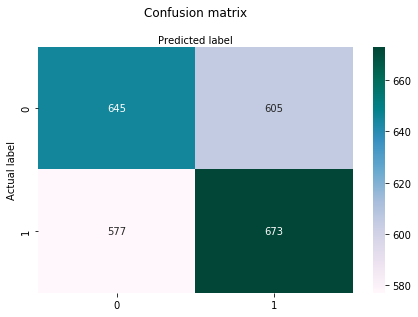

In [19]:
# confusion matrix plot
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(rbfcnf_matrix), annot=True, cmap="PuBuGn" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [35]:
# Checking for Overfitting and under fitting
clf=RandomForestClassifier(n_estimators=1000,max_depth = 4)

clf.fit(X_train,y_train)

y_pred=clf.predict(X_train)

In [36]:
print("Random forest Accuracy:",metrics.accuracy_score(y_train, y_pred))
print("Random forest Precision:",metrics.precision_score(y_train, y_pred))
print("Random forest Recall:",metrics.recall_score(y_train, y_pred))
print("Random forest AUC:",metrics.roc_auc_score(y_train, y_pred))

Random forest Accuracy: 0.5850666666666666
Random forest Precision: 0.591614014933946
Random forest Recall: 0.5493333333333333
Random forest AUC: 0.5850666666666666
